A força de empuxo gerada por cada um dos 3 propulsores é dada por 

$T_i = \rho K_{T_i} n^2_i D_i^4$

 e a força gerada por cada um dos lemes seja dada por 
 
 $F_D(\beta) = 0.5 \rho A_r C_D(\alpha_E) V_r^2$ (pode desprezar)
 
 e 
 
 $F_L(\beta) = 0.5 \rho A_r C_L(\alpha_E) V_r^2$ (vai ser aproximado por uma curva)

[-2.18096324e-04 -4.53833628e-18  1.05990036e+00  1.07195805e-15]


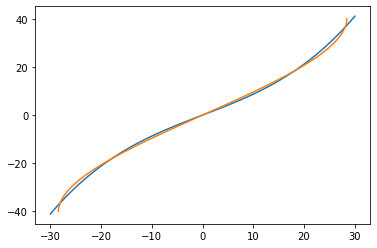

In [9]:
import numpy as np
import matplotlib.pyplot as plt
alfa = np.linspace(-30,30,100)
beta = 0.00062159*alfa**3 + 0.81046*alfa
plt.figure()
plt.plot(alfa,beta)

alfa2_p = np.polyfit(beta,alfa,3)
print(alfa2_p)
beta2 = np.linspace(-40,40,100)
alfa2 = alfa2_p[0]*beta2**3 + alfa2_p[1]*beta2**2 + alfa2_p[2]*beta2 + alfa2_p[0]
plt.plot(alfa2,beta2)



$J_1 = \frac{u}{n_1 D_1}$, $J_2 = \frac{u}{n_3 D_2}$, $J_3 = \frac{u}{n_3 D_3}$

$K_{T_1}=f(J_1)$, $K_{T_2}=f(J_2)$, $K_{T_3}=f(J_3)$

$T_1 = \rho K_{T_2} n^2_2 D_2^4$, $T_2 = \rho K_{T_2} n^2_2 D_2^4$, $T_3 = \rho K_{T_3} n^2_3 D_3^4$

$\alpha_1 = f(\beta_1)$, $\alpha_2 = f(\beta_2)$ (deflexão causada pelo leme)

$\beta_i = 0.00062159\alpha_i^3 + 0.81046\alpha_i$

$ \alpha_i = -2.1809E-4\beta_i^3 + 1.0599 \beta_i$

$\tau_u = T1 \cos \alpha_1 + T2 \cos \alpha_2$

$\tau_v = T1 \sin \alpha_1 + T2 \sin \alpha_2 + T3$

$\tau_r = -T1 \cos \alpha_1 y_1 - T1 \sin \alpha_1 x_1 + T2 \cos \alpha_2 y_2 - T2 \sin \alpha_2 x_2 - T_3 x_3 $




In [26]:
import numpy as np 
import matplotlib.pyplot as plt
J = []
KT = []
with open("JKT.txt", 'r') as f:
    text = f.readlines()
    flag = -1
    for line in text:
        p = line.split('\t')
        if p[0]=='J1\n':
            flag=0
            J.append([])
            KT.append([])
        elif p[0]=='J2\n':
            flag=1
            J.append([])
            KT.append([])
        elif p[0]=='J3\n':
            flag=2
            J.append([])
            KT.append([])
        elif len(p)>1:
            J[flag].append(float(p[1]))
            KT[flag].append(float(p[5]))

KT_J1 = np.polyfit(J[0],KT[0],5)
KT_J2 = np.polyfit(J[1],KT[1],5)
KT_J3 = np.polyfit(J[2],KT[2],5)
print(KT_J1)
print(KT_J2)
print(KT_J3)

[ 1.09214295e-01 -1.89739146e-05 -1.91249589e-01  6.59504311e-06
 -4.14551312e-01  6.58016406e-01]
[ 1.09214295e-01 -1.89739146e-05 -1.91249589e-01  6.59504311e-06
 -4.14551312e-01  6.58016406e-01]
[ 0.01476418 -0.03187213 -0.38456785  0.19234734 -0.49985203  0.36826644]


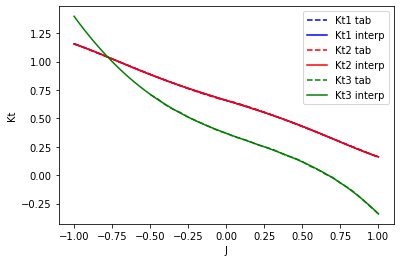

In [25]:
J_vec = np.linspace(-1,1,100)
KT1 = np.polyval(KT_J1,J_vec)
KT2 = np.polyval(KT_J2,J_vec)
KT3 = np.polyval(KT_J3,J_vec)
plt.figure()

plt.plot(J[0],KT[0],'b--',label="Kt1 tab")
plt.plot(J_vec,KT1,'b-',label="Kt1 interp")

plt.plot(J[1],KT[1],'r--',label="Kt2 tab")
plt.plot(J_vec,KT2,'r-',label="Kt2 interp")

plt.plot(J[2],KT[2],'g--',label="Kt3 tab")
plt.plot(J_vec,KT3,'g-',label="Kt3 interp")

plt.legend()
plt.xlabel("J")
plt.ylabel("Kt")
plt.show()
